## Test numpy & matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

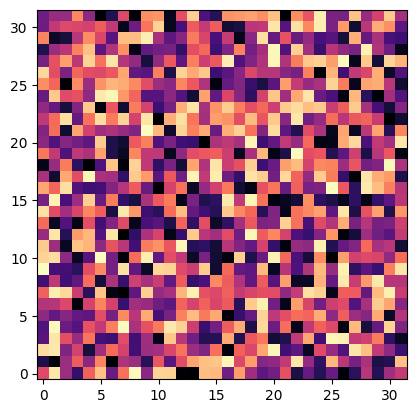

In [2]:
plt.imshow( np.random.rand( 32, 32 ), origin='lower', cmap=plt.get_cmap('magma') );

## Test MPI

In [3]:
import numpy as np
import ipcmagic
import ipyparallel as ipp

In [ ]:
%ipcluster start -n 4

In [ ]:
c = ipp.Client()

In [ ]:
c.ids

In [ ]:
%%px
import socket
from mpi4py import MPI

In [ ]:
%%px
print("Hello World from rank %s of %s on nid %s" % (MPI.COMM_WORLD.rank,
                                                    MPI.COMM_WORLD.size,
                                                    socket.gethostname()))

In [ ]:
c.close()
%ipcluster stop

## Test Cupy

In [ ]:
import numpy as np
import cupy as cp
import time

In [ ]:
### Numpy and CPU
s = time.time()
x_cpu = np.ones((1000,1000,1000))
e = time.time()
print(e - s)

### CuPy and GPU
s = time.time()
x_gpu = cp.ones((1000,1000,1000))
cp.cuda.Stream.null.synchronize()
e = time.time()
print(e - s)

## Test GT4Py

In [ ]:
import os
import warnings
import gt4py.next as gtx
from gt4py.next import Field

nx = 4
ny = 4
nz = 4
dtype = np.float64

backend = gtx.itir_python
# backend = gtx.gtfn_cpu
# backend = gtx.gtfn_gpu

I = gtx.Dimension("I")
J = gtx.Dimension("J")
K = gtx.Dimension("K", kind=gtx.DimensionKind.VERTICAL)

domain = gtx.domain({I: nx, J: ny, K: nz})

in_field = gtx.as_field(
    domain,
    np.fromfunction(lambda x, y, z: x**2 + y**2, shape=(nx, ny, nz)),
    dtype,
    allocator=backend,
)
out_field = gtx.zeros(domain, dtype, allocator=backend)

In [ ]:
Ioff = gtx.FieldOffset("I", source=I, target=(I,))
Joff = gtx.FieldOffset("J", source=J, target=(J,))

@gtx.field_operator
def copy_operator(inp: Field[[I, J, K], dtype]) -> Field[[I, J, K], dtype]:
    return inp

@gtx.program(backend=backend)
def copy_program(inp: Field[[I, J, K], dtype], out: Field[[I, J, K], dtype]):
    copy_operator(inp, out=out)

copy_program(in_field, out_field, offset_provider={"Ioff": I, "Joff": J})

print(out_field.asnumpy)

## Check installed packages

In [ ]:
%%bash
pip list